# **Tarea 3**
Presentada por Angela Cristina Villate
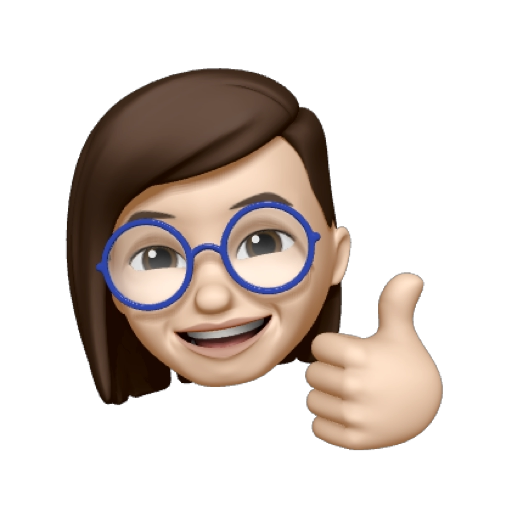





In [5]:
import nltk

En estas primeras líneas de código abrimos el archivo y lo codificamos para que pueda ser leído como str


In [6]:
from nltk.corpus import PlaintextCorpusReader

ruta = './'

corpus1 = PlaintextCorpusReader(ruta,'.txt')

In [23]:
fileids=corpus1.fileids()
print(fileids)
art1 = corpus1.words('Noticia.txt')
print(art1)

[]
['Polémica', 'en', 'Colombia', 'con', 'un', 'juez', ...]


In [24]:
doc = open('Noticia.txt',encoding='utf8')
raw = doc.read()
print(raw)

Polémica en Colombia con un juez que usó ChatGPT para una sentencia
MUNDO
02 Febrero 2023
El magistrado recurrió a la inteligencia artificial para preguntar sobre la normativa respecto a niños autistas y el pago de terapias. Según dijo, ChatGPT hace lo que antes le suministraba "un secretario".
Un juez de Colombia resolvió un caso sobre el derecho a la salud de un niño autista con ayuda del robot ChatGPT, siendo la primera sentencia en redactarse a partir de inteligencia artificial en el país. La Universidad del Rosario de Bogotá cuestionó la decisión del magistrado. 
Días atrás, una universidad francesa prohibió a los estudiantes su uso.
"Es una ventana inmensa, hoy puede ser ChatGPT, pero en tres meses puede ser cualquier otra alternativa que permita facilitar la redacción de textos y que el juez se apoye en ellos, no con el objetivo de que lo reemplacen", dijo el juez del caso, Juan Manuel Padilla, en entrevista con Blu Radio este jueves.

La sentencia con fecha del 30 de enero reso

In [25]:
type(doc)

_io.TextIOWrapper

**Mi primera experiencia con una librería de HuggingFace**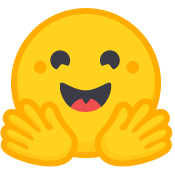

In [1]:
!pip install stanza

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 691.3/691.3 KB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 KB 26.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=cc7cddc40db461a1b8bf9b0f53a5974d4dcc2001599813a0cb4455ef7d39baf4
  Stored in directory: /root/.cache/pip/wheels/86/62/9e/a6b27a681abcde69970dbc0326ff51955f3beac72f15696984
Successfully built emoji


En esta línea importamos la librería, le indicamos la lengua y el modelo, por defecto, el modelo de español es ANCORA

In [2]:
import stanza
stanza.download(lang='es', package='ancora')

INFO:stanza:Downloading these customized packages for language: es (Spanish)...
| Processor       | Package      |
----------------------------------
| tokenize        | ancora       |
| mwt             | ancora       |
| pos             | ancora       |
| lemma           | ancora       |
| depparse        | ancora       |
| ner             | ancora       |
| pretrain        | ancora       |
| forward_charlm  | newswiki     |
| backward_charlm | newswiki     |
| pretrain        | fasttextwiki |



INFO:stanza:Finished downloading models and saved to /root/stanza_resources.


Llamamos el modelo y le indicamos las funciones que queremos ejecutar, la documentación aquí https://stanfordnlp.github.io/stanza/available_models.html


In [3]:
nlp_es= stanza.Pipeline(lang='es', processors = 'tokenize, mwt, pos')

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Loading these models for language: es (Spanish):
| Processor | Package |
-----------------------
| tokenize  | ancora  |
| mwt       | ancora  |
| pos       | ancora  |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Done loading processors!


**Ejecutamos el modelo con nuestro texto**

In [29]:
doc_es=nlp_es(raw)
doc_es

[
  [
    {
      "id": 1,
      "text": "Polémica",
      "upos": "NOUN",
      "xpos": "ncfs000",
      "feats": "Gender=Fem|Number=Sing",
      "start_char": 0,
      "end_char": 8
    },
    {
      "id": 2,
      "text": "en",
      "upos": "ADP",
      "xpos": "sps00",
      "start_char": 9,
      "end_char": 11
    },
    {
      "id": 3,
      "text": "Colombia",
      "upos": "PROPN",
      "xpos": "np00000",
      "start_char": 12,
      "end_char": 20
    },
    {
      "id": 4,
      "text": "con",
      "upos": "ADP",
      "xpos": "sps00",
      "start_char": 21,
      "end_char": 24
    },
    {
      "id": 5,
      "text": "un",
      "upos": "DET",
      "xpos": "di0ms0",
      "feats": "Definite=Ind|Gender=Masc|Number=Sing|PronType=Art",
      "start_char": 25,
      "end_char": 27
    },
    {
      "id": 6,
      "text": "juez",
      "upos": "NOUN",
      "xpos": "nccs000",
      "feats": "Number=Sing",
      "start_char": 28,
      "end_char": 32
    },
    {
    

***En las siguientes líneas de código se realiza el preprocesamiento de texto, tokinazación, steming, conteo de palabras e identificación de categorías lingüísticas ***

In [30]:
data1 = raw.lower()
print(data1[:500])

polémica en colombia con un juez que usó chatgpt para una sentencia
mundo
02 febrero 2023
el magistrado recurrió a la inteligencia artificial para preguntar sobre la normativa respecto a niños autistas y el pago de terapias. según dijo, chatgpt hace lo que antes le suministraba "un secretario".
un juez de colombia resolvió un caso sobre el derecho a la salud de un niño autista con ayuda del robot chatgpt, siendo la primera sentencia en redactarse a partir de inteligencia artificial en el país. l


In [31]:
import re

En este paso empezamos el procesamiento del texto

In [32]:
data2 = re.sub(r"[\W\d_]+", " ", data1)
print(data2[:100])

polémica en colombia con un juez que usó chatgpt para una sentencia mundo febrero el magistrado recu


Aquí está la tokenización

In [33]:
data3 = data2.split()
data3

['polémica',
 'en',
 'colombia',
 'con',
 'un',
 'juez',
 'que',
 'usó',
 'chatgpt',
 'para',
 'una',
 'sentencia',
 'mundo',
 'febrero',
 'el',
 'magistrado',
 'recurrió',
 'a',
 'la',
 'inteligencia',
 'artificial',
 'para',
 'preguntar',
 'sobre',
 'la',
 'normativa',
 'respecto',
 'a',
 'niños',
 'autistas',
 'y',
 'el',
 'pago',
 'de',
 'terapias',
 'según',
 'dijo',
 'chatgpt',
 'hace',
 'lo',
 'que',
 'antes',
 'le',
 'suministraba',
 'un',
 'secretario',
 'un',
 'juez',
 'de',
 'colombia',
 'resolvió',
 'un',
 'caso',
 'sobre',
 'el',
 'derecho',
 'a',
 'la',
 'salud',
 'de',
 'un',
 'niño',
 'autista',
 'con',
 'ayuda',
 'del',
 'robot',
 'chatgpt',
 'siendo',
 'la',
 'primera',
 'sentencia',
 'en',
 'redactarse',
 'a',
 'partir',
 'de',
 'inteligencia',
 'artificial',
 'en',
 'el',
 'país',
 'la',
 'universidad',
 'del',
 'rosario',
 'de',
 'bogotá',
 'cuestionó',
 'la',
 'decisión',
 'del',
 'magistrado',
 'días',
 'atrás',
 'una',
 'universidad',
 'francesa',
 'prohibió',
 

Eliminamos las palabras vacías

In [35]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [36]:
from nltk.corpus import stopwords
stopwords_sp = stopwords.words('spanish')

In [37]:
data4 = [palabra for palabra in data3 if palabra not in stopwords_sp]
data4

['polémica',
 'colombia',
 'juez',
 'usó',
 'chatgpt',
 'sentencia',
 'mundo',
 'febrero',
 'magistrado',
 'recurrió',
 'inteligencia',
 'artificial',
 'preguntar',
 'normativa',
 'respecto',
 'niños',
 'autistas',
 'pago',
 'terapias',
 'según',
 'dijo',
 'chatgpt',
 'hace',
 'suministraba',
 'secretario',
 'juez',
 'colombia',
 'resolvió',
 'caso',
 'derecho',
 'salud',
 'niño',
 'autista',
 'ayuda',
 'robot',
 'chatgpt',
 'siendo',
 'primera',
 'sentencia',
 'redactarse',
 'partir',
 'inteligencia',
 'artificial',
 'país',
 'universidad',
 'rosario',
 'bogotá',
 'cuestionó',
 'decisión',
 'magistrado',
 'días',
 'atrás',
 'universidad',
 'francesa',
 'prohibió',
 'estudiantes',
 'uso',
 'ventana',
 'inmensa',
 'hoy',
 'puede',
 'ser',
 'chatgpt',
 'tres',
 'meses',
 'puede',
 'ser',
 'cualquier',
 'alternativa',
 'permita',
 'facilitar',
 'redacción',
 'textos',
 'juez',
 'apoye',
 'objetivo',
 'reemplacen',
 'dijo',
 'juez',
 'caso',
 'juan',
 'manuel',
 'padilla',
 'entrevista',
 

**Conteo de palabras más usadas**

In [38]:
from collections import Counter
Counter(data4).most_common(10)

[('chatgpt', 12),
 ('inteligencia', 6),
 ('artificial', 6),
 ('juez', 5),
 ('sentencia', 5),
 ('terapias', 4),
 ('universidad', 4),
 ('uso', 4),
 ('puede', 4),
 ('ser', 4)]

**Steming del documento**

In [39]:
from nltk.stem.snowball import SnowballStemmer
spanishStemmer=SnowballStemmer("spanish")

In [40]:
data_stem = [spanishStemmer.stem(palabra) for palabra in data4]
data_stem

['polem',
 'colombi',
 'juez',
 'uso',
 'chatgpt',
 'sentenci',
 'mund',
 'febrer',
 'magistr',
 'recurr',
 'inteligent',
 'artificial',
 'pregunt',
 'normat',
 'respect',
 'niñ',
 'autist',
 'pag',
 'terapi',
 'segun',
 'dij',
 'chatgpt',
 'hac',
 'suministr',
 'secretari',
 'juez',
 'colombi',
 'resolv',
 'cas',
 'derech',
 'salud',
 'niñ',
 'autist',
 'ayud',
 'robot',
 'chatgpt',
 'siend',
 'primer',
 'sentenci',
 'redact',
 'part',
 'inteligent',
 'artificial',
 'pais',
 'univers',
 'rosari',
 'bogot',
 'cuestion',
 'decision',
 'magistr',
 'dias',
 'atras',
 'univers',
 'frances',
 'prohib',
 'estudi',
 'uso',
 'ventan',
 'inmens',
 'hoy',
 'pued',
 'ser',
 'chatgpt',
 'tres',
 'mes',
 'pued',
 'ser',
 'cualqui',
 'altern',
 'permit',
 'facilit',
 'redaccion',
 'text',
 'juez',
 'apoy',
 'objet',
 'reemplac',
 'dij',
 'juez',
 'cas',
 'juan',
 'manuel',
 'padill',
 'entrev',
 'blu',
 'radi',
 'juev',
 'sentenci',
 'fech',
 'ener',
 'resolv',
 'ped',
 'madr',
 'hij',
 'autist',
 '

R**aíces más usadas**

In [41]:
from collections import Counter
Counter(data_stem).most_common(10)

[('chatgpt', 12),
 ('inteligent', 6),
 ('artificial', 6),
 ('hac', 6),
 ('juez', 5),
 ('uso', 5),
 ('sentenci', 5),
 ('pregunt', 5),
 ('univers', 5),
 ('ser', 5)]

**Verbos y sustantivos**

In [43]:
import spacy
from spacy.lang.es.examples import sentences

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [45]:
!pip install spacy 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [50]:
!pip install es-core-news-sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 79.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 103.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 62.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 671.1/671.1 KB 59.2 MB/s eta 0:00:00
  Attempting uninstall: typer
    Found existing installation: typer 0.7.0
    Uninstalling typer-0.7.0:
      Successfully uninstalled typer-0.7.0
  Attempting uninstall: pydantic
    Found existing installation: pydantic 1.10.4
    Uninstalling pydantic-1.10.4:
      Successfully uninstalled pydantic-1.10.4
  Attempting uninstall: thinc
    Found existing installation: thinc 8.1.7
    Uninstalling thinc-8.1.7:
      Successfully uninstalled thinc-8.1.7
  Attempting uninstall: spacy
    Found existing installation: spacy 3.4.4
    Uninstalling spacy-3.4.4:
      Successf

In [51]:
import spacy  
import es_core_news_sm

/usr/local/lib/python3.8/dist-packages/spacy/util.py:877: UserWarning: [W095] Model 'es_core_news_sm' (3.1.0) was trained with spaCy v3.1 and may not be 100% compatible with the current version (3.4.4). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  encoding="utf8",


**En la siguiente línea se presenta la contabilidad de las expresiones y su naturaleza lingüística**

In [53]:
nlp = es_core_news_sm.load()
doc = nlp(" ".join(data2))

data_pos = [w.pos_ for w in doc] # [(w.text, w.pos_) for w in doc]

Counter(data_pos).most_common()

/usr/local/lib/python3.8/dist-packages/spacy/util.py:877: UserWarning: [W095] Model 'es_core_news_sm' (3.1.0) was trained with spaCy v3.1 and may not be 100% compatible with the current version (3.4.4). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  encoding="utf8",


[('CCONJ', 1648),
 ('NOUN', 840),
 ('SPACE', 628),
 ('ADP', 475),
 ('PROPN', 129),
 ('SYM', 111),
 ('ADV', 14),
 ('NUM', 13),
 ('ADJ', 11),
 ('AUX', 4),
 ('PRON', 2),
 ('DET', 1)]